# Plot Measurement Notebook
Here is the library for functions used to compare different years.

In [54]:
import sys
import csv
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.signal import argrelextrema
import numpy as np


def days_since(og_date):
    if re.match("20\d\d-\d\d-\d\d", str(og_date)) is None: return -1
    year = int(og_date[0:4])
    month = int(og_date[5:7])
    day = int(og_date[8:10])
    daycount = 0
    daycount += day - 1

    #next, do the months
    while(month > 1):
        if month == 2:
            if(year == 2016 or year == 2020): daycount += 29
            else: daycount += 28
        elif month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            daycount += 31
        else: daycount += 30
        month -= 1

    while(year > 2014):
        if year == 2020 or year == 2016:
            daycount += 366
        else: daycount += 365
        year -= 1
    return(daycount)



def get_table(ogfile):
    with open(ogfile) as make_dates:
        make_dates_reader = make_dates.read() + "\n"
    match = re.findall("20\d\d-\d\d-\d\d", make_dates_reader)
    dates_lib = dict()
    for row in match:
        if dates_lib.get(days_since(row),0) == 0:
            dates_lib[days_since(row)] = 1
        else: dates_lib[days_since(row)] += 1
    
    data = pd.DataFrame.from_dict(list(dates_lib.items()))
    data.columns = ["days_since", "frequency"]
    data = data.sort_values(by = ['days_since'])

    
    return data

def make_bins(data, mode, use_bin_numbers = False, bintervals = 0):
    final_list = []


    if mode == "localmaxmin":
        to_append = data.iloc[argrelextrema(data.frequency.values, np.less,
                    order=80)[0]]['days_since']
        to_append = to_append.tolist()
        for row in to_append:
            final_list.append([row, -1])


    elif mode == "time":
        x = 159
        while x < data.iloc[-1][0]:
            final_list.append([x, -1])
            x += bintervals


    elif mode == "tweets":
        if use_bin_numbers:
            if bintervals == 0: raise Exception("Specify a number of bins please!")
            tweet_cap = int((data.sum()[1]) / bintervals)
            makebins(data, mode, bintervals = tweet_cap)

        else:
            x = 0
            exhaust = 0
            while x < len(data):
                if exhaust + data.iloc[x][1] > bintervals:
                    final_list.append([data.iloc[x][0], x])
                    exhaust = 0
                    x += 1
                else:
                    exhaust += data.iloc[x][1]
                    x += 1
    elif mode == "threshold""
        

    else: raise Exception("Please use 'time', 'tweets', or 'localmaxmin'")

    return final_list


def make_plot(data, bins = None):
    plt.plot(data['days_since'], data['frequency'])
    if bins is not None:
        for x in range(len(bins)):
            plt.axvline(x = bins[x][0], color = 'r', label = bins[x][0])
    if bins is not None:
        plt.savefig("plot_binned.jpg")
    else: plt.savefig("plot.jpg")
    print("The indices of bin partitions are located at the first value in each pair in the following array:")
    print(bins)
    plt.show()
data = get_table("merged_random_sample.csv")

### Method One: Tweets
Here's sample \#1, which uses tweet counts to varying degrees. I've added an implementation where you should be able to specify the amount of bins you want, but this feature is buggy for the time being due to rounding errors. You can adjust *bintervals* to see how many bins are created and where.

The indices of bin partitions are located at the first value in each pair in the following array:
[[266, 55], [337, 120], [534, 288], [1317, 702], [2341, 957], [2343, 959], [2346, 962], [2354, 970], [2401, 1016]]


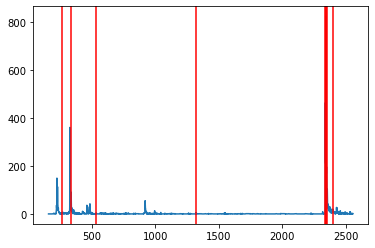

In [50]:
bins = make_bins(data, "tweets", bintervals = 1000)
make_plot(data, bins)

### Method Two: Time
Sample \#2 uses days since as the *bintervals* variable. Once again, adjusting the value will change the cap for how many days.

The indices of bin partitions are located at the first value in each pair in the following array:
[[159, -1], [409, -1], [659, -1], [909, -1], [1159, -1], [1409, -1], [1659, -1], [1909, -1], [2159, -1], [2409, -1]]


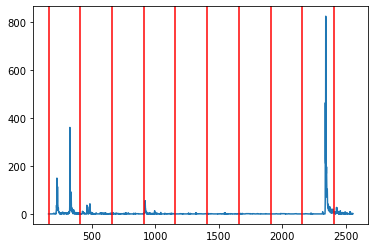

In [22]:
bins = make_bins(data, "time", bintervals = 250)
make_plot(data, bins)

### Method Three: Local max, min
*bintervals* here modifies the order of magnitude for localmaxmin. I cannot really explain what changing the order of magnitude has done, as different uses have given me different experiences.

The indices of bin partitions are located at the first value in each pair in the following array:
[]


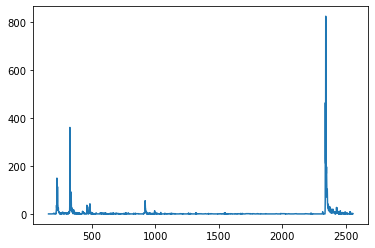

In [56]:
data = get_table("merged_random_sample.csv")
bins = make_bins(data, "localmaxmin", bintervals = 0)
make_plot(data, bins)

In [ ]:
##When bin exceeds x, new trough. but we go to lowest low point and extend to next lowest low point